In [1]:
import pandas as pd

## Рассмотрим данные об оттоке клиентов некоторого банка.

In [2]:
churn_df = pd.read_csv("churn.csv", sep = ",")

## Прежде чем приступить к детальному анализу данных, ознакомимся с ними и посмотрим на их структуру

In [3]:
display(churn_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


None

In [4]:
#Избавимся от лишней информации, удалим столбец RowNumber с помощью метода drop().
churn_df = churn_df.drop(["RowNumber"], axis=1)
display(churn_df.head())

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
import plotly

In [6]:
import plotly.express as px
print(plotly.__version__)

5.13.1


## 9.1. Каково соотношение ушедших и лояльных клиентов? 
Для того, чтобы ответить на этот вопрос построим круговую диаграмму, предварительно посчитав количество значений для лояльных и ушедших клиентов с помощью value_counts()

In [26]:
client_status = churn_df["Exited"].value_counts()
#строим график
fig = px.pie(
    data_frame= client_status,
    values= client_status,
    names= ['Лояльные клиенты','Ушедшие клиенты']
)

fig.show()
fig.write_html("images/pie.html")

Из графика видно, что доля лояльных клиентов преобладает, однако доля в 20,4% ушедших клиентов является значительной для банка. Банку необходимо проанализировать данные для того, чтобы понять причины, по которым клиенты отказываются от услуг данного банка.

In [8]:
import seaborn as sns

## 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. 
Для постороения данного графика предварительно отфильтруем счета с остатками на балансе свыше 2500 долл.

In [27]:
filter = churn_df[churn_df["Balance"] > 2500]
#строим график
fig = px.histogram(
  data_frame=filter,
  x="Balance",
  height=700,
  width=1000,
  title="График распределения баланса по клиентам с остатком на счете от 2500 долл.",
  nbins=25
)
fig.update_xaxes(title_text='Баланс')
fig.update_yaxes(title_text='Количество клиентов')
fig.show()
fig.write_html("images/histogram.html")

Данная гистрограмма показывает, что остаток на счете клиента не превышает отметку в 251 тыс. долл.
Также график четко показывает, что модальное значение располается в диапозоне от 120 до 130 тыс. долл., то есть большинство наблюдений сосредоточено в данном интервале, а клиенты с более высоким остатком на счете с меньшей вероятностью покинут банк по сравнению с теми, у кого он меньше. В целом, можно сказать, что распределение похоже на нормальное.

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
plt.style.use('default')

## 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока.
Теперь посмотрим, как различаются суммы на счетах ушедших и лояльных клиентов. Для удобства создадим новый признак, который будет делить клиентов на: "Лояльный" и "Ушедший", для этого создадим новый столбец "Status".

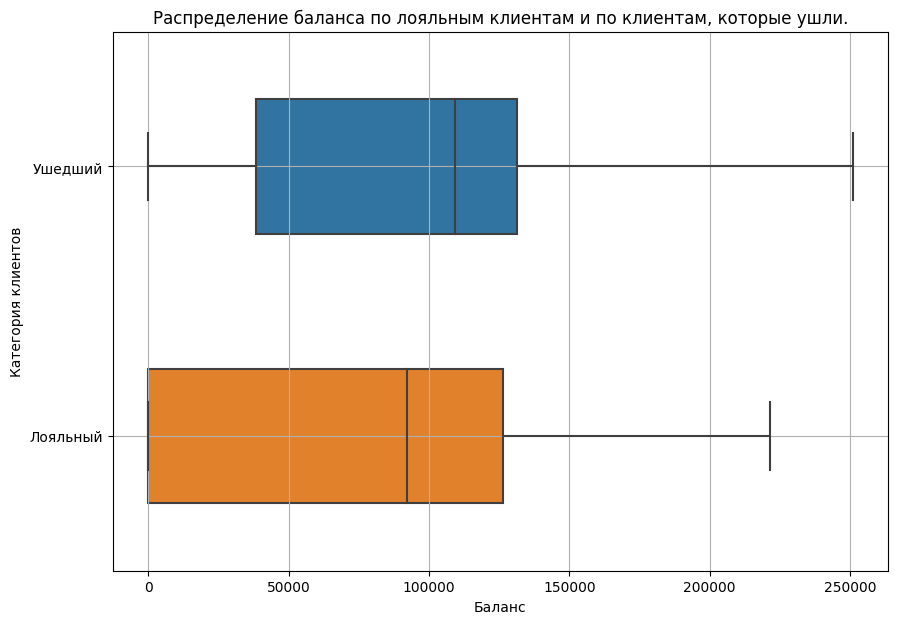

In [12]:
status = churn_df['Exited']
churn_df["Status"]= status.apply(lambda x: 'Лояльный' if x == 0 else 'Ушедший')
#строим график
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_df,
    y="Status",
    x="Balance",
    orient="h",
    width=0.5
)

boxplot.set_title("Распределение баланса по лояльным клиентам и по клиентам, которые ушли.");
boxplot.set_xlabel('Баланс');
boxplot.set_ylabel('Категория клиентов');
boxplot.grid();


Наибольший разброс имеет баланс ушедших клиентов, хотя не сильно отличается от разброса для лояльных клиентов. Интересно то, что можно сказать, что баланс ушедших клиентов более стабилен и имеет большие показатели (медианное значение тоже это подтверждает), чем у лояльных клиентов. Также стоить отметить, что нулевой баланс встречается намного чаще у лояльных клиентов, чем у ушедших. Отсюда следует вывод, что банку необходимо обратить пристальное внимание на ушедших клиентов, так банк теряет потенциально значимых клиентов, и как следствие теряет выгоду. 
В дополнение к вышепостроенному графику постороим еще одну гистограмму, количество наблюдений, а именно остатки на счетах клиента, будет обозначаться на диаграмме яркостью цвета (чем темнее полоса, тем больше наблюдений находится в интервале).

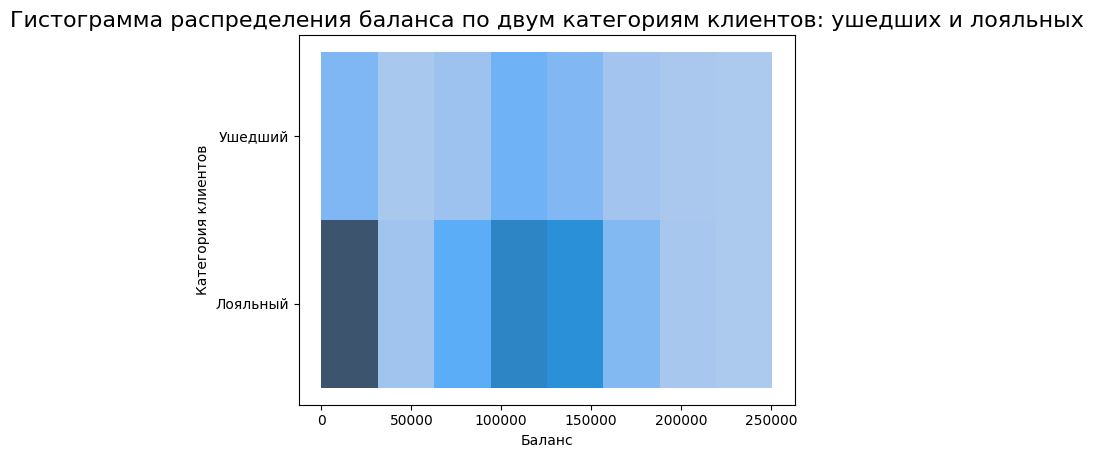

In [13]:
#строим график
fig = sns.histplot(
    data=churn_df,
    x="Balance",
    y="Status",
    bins=8,
);
fig.set_title("Гистограмма распределения баланса по двум категориям клиентов: ушедших и лояльных", fontsize=16);
fig.set_xlabel('Баланс');
fig.set_ylabel('Категория клиентов');



Данный график подтверждает, что количество меньших сумм (до 30-35 тыс.долл.) наблючается чаще у лояльных клиентов, чем у ушедших, при этом среднее значение остатков практически сопоставимы для двух категорий клиентов (от 100 до 150 тыс.долл). Данное наблюдение подтверждает упущенную прибыль банка.

## 9.4. Посмотрите на распределение возраста в разрезе признака оттока.
Теперь рассмотрим показатель возраста для двух категорий клиентов.

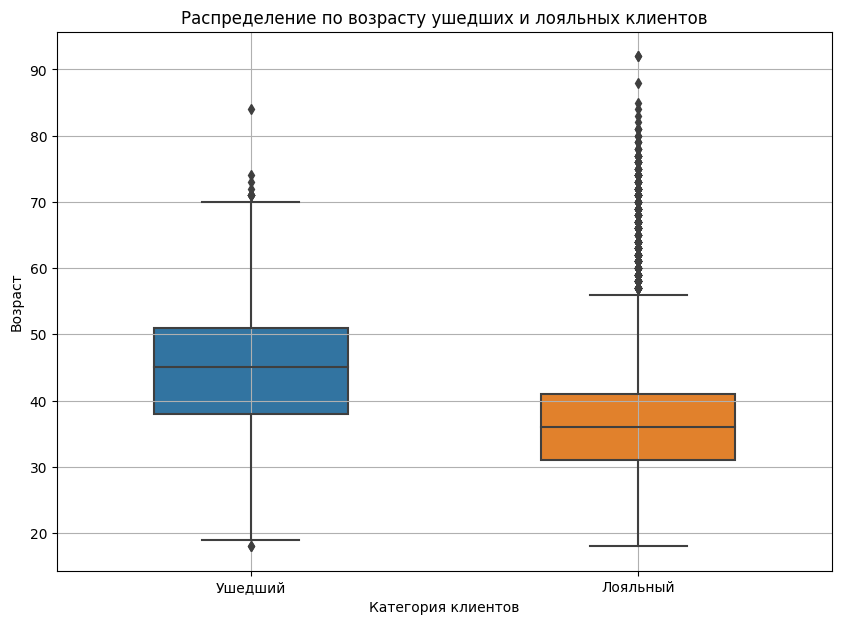

In [14]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_df,
    y="Age",
    x="Status",
    orient="v",
    width=0.5
)
boxplot.set_title("Распределение по возрасту ушедших и лояльных клиентов");
boxplot.set_xlabel("Категория клиентов");
boxplot.set_ylabel("Возраст");
boxplot.grid();


Грифик наглядно иллюстрирует, что основная возрастная категория и для лояльных, и для ушедших клиентов сосредоточена в диапозоне 31-51 год, то есть это категория работающих людей, имеющих стабильный доход и семью. При этом медианное значения для лояльных клиентов - 35 лет, а для ушедших - 45 лет. Из данного наблюдения можно предположить, что банк не доработал свои услуги для более старшей категории клиентов, чьи требования к предоставляемым услугам могут быть выше. Также бросается в глаза количество потенциальных выбросов для лояльных клиентов, их можно было бы считать аномалиями и исключить из данных, однако, это маловероятно, так как пользуясь услугами банка, клиенты предоставляют официальные документы, и указание неверного возраста практически исключено. Скорее всего наоборот, это связано с тем, что пожилые люди более лояльны к банку и реже, чем молодые, меняют обслуживающий банк.

## 9.5 Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты.

In [28]:
fig = px.scatter(
    data_frame=churn_df,
    x = 'EstimatedSalary', 
    y = 'CreditScore',   
    color='Exited',     
    title='Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты'
)
fig.update_xaxes(title_text='Предполагаемая зарплата клиента')
fig.update_yaxes(title_text='Кредитный рейтинг клиента')
fig.show()
fig.write_html("images/scatter.html")

На основе графика рассяния сложно сделать какой либо вывод, так как не видно четкой взаимосвязи между двуми показателями (предполагаемой зарплатой и кредитным рейтингом клиета) для двух категорий клиентов. Однако, мы можем отметить, что кредитный рейтинг ниже 400-отметки наблюдается только для ушедших клиентов, причем независимо от уровня з/п, что, скорее всего, говорит о том, что данная категория не так часто пользуется услугами банка (не берут кредиты, не пользуется картами и т.д.) 

## 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.
Для ответа на данный вопрос построим круговую диаграмму и возьмем категорию только ушедших клиентов.

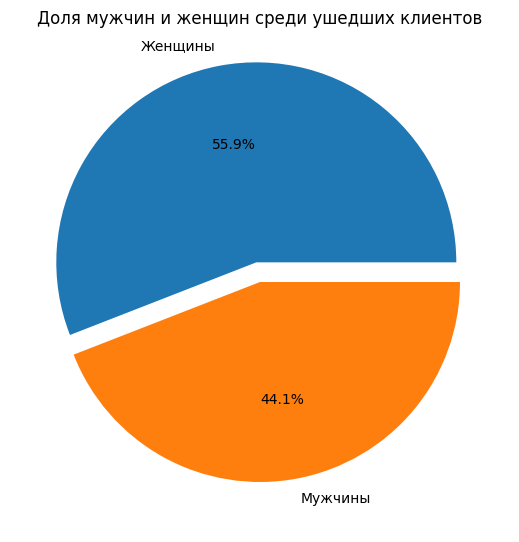

In [16]:
filtered_churn_df = churn_df[churn_df["Exited"] == 1]
gender_combinations = filtered_churn_df["Gender"].value_counts()
# строим график
fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    gender_combinations, # берем данные об ушедших клиентах
    labels=['Женщины', 'Мужчины'],
    autopct='%.1f%%', #округление до первого знака после запятой
    explode=[0.1, 0] #доля смещения от центра
)
axes.set_title('Доля мужчин и женщин среди ушедших клиентов');

Вы видим преобладание с небольшим перевесом женской аудитории среди ушедших клиентов. Причины для этого могут быть разные, начиная от качества до возможной сложности предоставляемых услуг. Зная также средний возраст, Банк может провести ряд мероприятий по усовершенствованию своих продуктов, которые соответствовали бы ожиданиям данной категории.

## 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? 
Для ответа на этот вопрос построим многоуровневую столбчатую диаграмму, предварительно создав сводную таблицу с помощью метода pivot_table.

In [34]:
pivot = churn_df.pivot_table(
    values='CustomerId',
    index='NumOfProducts',
    columns="Status",
    aggfunc='count',
    fill_value=0 # заменяем на 0 возможные пропуски данных
)
print(pivot)

Status         Лояльный  Ушедший
NumOfProducts                   
1                  3675     1409
2                  4242      348
3                    46      220
4                     0       60


In [35]:
# строим график 
fig = px.bar(
    pivot,
    barmode = 'group',
    height=500,
    width=1000,
    title='Взаимосвязь оттока клиентов и числа приобретённых услуг'
)
fig.update_xaxes(title_text='Количество приобретенных услуг клиентом, шт')
fig.update_yaxes(title_text='Количество клиентов')
fig.show()
fig.write_html("images/bar.html")

Данный график демонстрирует количество приобретенных продуктов в абсолютном выражении (в штуках) для каждой категории клиентов. Мы видим, что для лояльных клиентов в основном характерно наличие двух продуктов, в то время, как ушедшие клиенты пользовались большим количеством предлагаемых услуг. В любом случае, напрашивается вывод о недостаточности продуктов и услуг Банка. Возможно это - одна из причин оттока клиентов. Попробовав все возможные услуги банка, клиенты не получили желаемого и воспользовались конкурентным предложением.

Для более детального анализа построим еще один график уже по среднему оттоку клиентов по количеству продуктов, так как нам также важно  сравнение ушедших клиентов со всеми клиентами в целом по количеству купленных продуктов. Для этого группируем клиентов по количеству продуктов и считаем среднее количество ушедших клиентов по каждой категории, далее строем столбчатую диаграмму.

In [36]:
grouped_clients = round(churn_df.groupby(["NumOfProducts"])["Exited"].mean(),2)
#строим график
fig = px.bar(
    data_frame=grouped_clients, #датафрейм
    x=grouped_clients.index, #ось x
    y="Exited", #ось y
    color=grouped_clients.index, #расцветка в зависимости от количества приобретенных услуг
    text = "Exited", #текст на столбцах
    orientation='v', #ориентация графика
    height=500, #высота
    width=1000, #ширина
)
#отображаем его
fig.show()
fig.write_html("images/bar1.html")

На основе двух графиков мы видим, что все клиенты, попробовавшие 4 продукта ушли, первый график это также подтверждает, так как по четыре продукта имели только ушедшие клиенты. Это свидетельствует о необходимости расширять продуктовую линейку банка.


## 9.8. Как влияет наличие статуса активного клиента на отток клиентов?
Для удобства построим сводную таблицу.

In [20]:
churn_df['IsActiveMember'] = churn_df['IsActiveMember'].apply(lambda x: 'Неактивный' if x == 0 else 'Активный')
pivot = churn_df .pivot_table(
    values="CustomerId",
    index="IsActiveMember",
    columns="Status",
    aggfunc="count"
)
print(pivot)


Status          Лояльный  Ушедший
IsActiveMember                   
Активный            4416      735
Неактивный          3547     1302


In [37]:
#строим график
fig = px.bar(
    pivot,
    barmode = 'group',
    height=500,
    width=600,
    title='Взаимосвязь оттока клиентов и числа приобретённых услуг'
)
fig.update_xaxes(title_text='Статус клиента')
fig.update_yaxes(title_text='Количество клиентов')
fig.show()
fig.write_html("images/bar2.html")

Для активным клиентов мы видим хорошее соотношение: преобладают лояльные клиенты, а доля ушедших клиентов невелика. Банку стоит обратить внимание на неактивных клиентов, во-первых, потому что здесь велика доля лояльных клиентов, с которыми необходимо провести ряд мероприятий для возобновления их активности, а также можно провести ряд "удерживающих" мер для ушедших клиентов, таких как: 
-уточнить причину оттока;
-получить обратную связь(что устраивает, что нет);
-возможность "здесь и сейчас" напомнить о преимуществах продуктов данного банка;
-настроить регулярные коммуникации с клиентами;
-разработать программу лояльности;
-а также непрерывно отслеживать предпочтения и поведение клиентов, чтобы знать, что им нужно.


## 9.9. В какой стране доля ушедших клиентов больше?
Ответить на этот вопрос поможет тепловая картограмма, которая покажет это соотношение на карте мира.

In [38]:
exited_grouped = churn_df.groupby(["Geography"])["Exited"].mean()
fig = px.choropleth(
    data_frame=exited_grouped,
    locations=exited_grouped.index,
    locationmode="country names",
    color="Exited",
    scope='europe',
    range_color=[0,0.3],
    title="Распределение доли ушедших клиентов по странам",
    width=800,
    height=500,
    color_continuous_scale="Blues"
)
fig.show()
fig.write_html("images/choropleth.html")

Данный график наглядно показывает, что максимальный отток клиентов приходится на Германию, в Испании и Франции практически одинаковые показатели среднего оттока(0.17 и 0.16 соответственно). Такая ситуация для Германии может быть по ряду социально-экономических и политических причин. Необходимо провести анализ во временном разрезе и выявить причины: был ли кризис в стране за данный период, уровень инфляции, уровень доверия населения к банковскому сектору в целом, и уже на основании этих данных разработать ряд мероприятий по удержанию клиентов, например улучшить привлекательность продуктов с учетом социальных программ, предоставление скидок или надбавок и пр.

## 9.10 Построим тепловую карту и найдем категории клиентов, которые уходят чаще всего.

In [23]:
#Приведем числовой признак CreditScore в категориальный с помощью функции get_credit_score_cat
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_df["CreditScoreCat"] = churn_df["CreditScore"].apply(get_credit_score_cat)
display(churn_df.head())

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Status,CreditScoreCat
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,Активный,101348.88,1,Ушедший,Fair
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,Активный,112542.58,0,Лояльный,Fair
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,Неактивный,113931.57,1,Ушедший,Poor
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,Неактивный,93826.63,0,Лояльный,Good
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,Активный,79084.10,0,Лояльный,Excellent


In [24]:
#Создадим сводную таблицу
pivot = churn_df.pivot_table(
    values="Exited",
    index="CreditScoreCat",
    columns="Tenure",
    fill_value=0
)
print(pivot)

Tenure                0         1         2         3         4         5   \
CreditScoreCat                                                               
Excellent       0.275000  0.208333  0.137255  0.168317  0.131868  0.233333   
Fair            0.217391  0.215596  0.213043  0.216450  0.197248  0.206897   
Good            0.203822  0.203608  0.187342  0.205962  0.195122  0.214470   
Poor            0.226415  0.259398  0.211765  0.212245  0.233202  0.199153   
Very_Poor       0.444444  0.253731  0.151515  0.285714  0.293103  0.149254   

Tenure                6         7         8         9         10  
CreditScoreCat                                                    
Excellent       0.241379  0.127660  0.196078  0.270833  0.254902  
Fair            0.236364  0.171103  0.209016  0.190045  0.205357  
Good            0.182857  0.191892  0.152355  0.194667  0.197802  
Poor            0.179916  0.151261  0.214575  0.251082  0.169492  
Very_Poor       0.225352  0.206349  0.253521  0.229

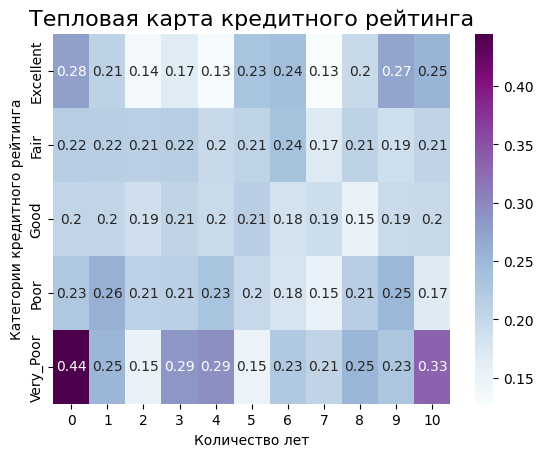

In [25]:
#Построим график
heatmap = sns.heatmap(data=pivot,  annot=True, cmap='BuPu')
heatmap.set_title('Тепловая карта кредитного рейтинга', fontsize=16);
heatmap.set_xlabel('Количество лет');
heatmap.set_ylabel('Категории кредитного рейтинга');

Согласно легенде справа, чем ближе цвет полосы к насыщенно фиолетовому, тем больше среднее значение ушедших клиентов. 
На основе тепловой карты мы можем наблюдать наибольшую концентрацию ушедших клиентов для категории с кредитным рейтинком "Very_Poor" при пользовании банковскими продуктами до года, а также будучи клиентом банка 10 лет, что может говорить о том, что клиенты данной группы не были удовлетворены качеством предоставляемых услуг на первом годе обслуживания, а также по истечению 10 лет.
Интересно, что и для категории клиентов с рейтингом "Excellent" примерно такая же картина, наибольшее значение ушедших клиентов в интервале 1 год и 9-10 лет. Это может быть сигналом для банка о необходимости наладить коммуникацию с клиентами, чтобы повысить их лояльность, а также расширить продуктовую линейку предоставляемых услуг, чтобы у клиентов был выбор, соответствующий их потребностям.